**We estimate the mutual information between the input layer and a hidden layer as well as the input layer and the output layer for a single csv file**

In [6]:
import numpy as np
import pandas as pd
from experimental_setup import ZivInformationPlane
import ast 

# Load the CSV file containing both the input data (embeddings) and the hidden layer weights
csv_file = 'model-weights-step-115000.csv'
weights_df = pd.read_csv(csv_file)

# Extract the weights for the 'transformer.embeddings.weight' layer
input_data_row = weights_df[weights_df['Layer'] == 'transformer.embeddings.weight']
input_data_str = input_data_row['Weights'].values[0]  # Get the weights as a string

# Safely convert the string representation of the list to a Python list using ast.literal_eval
input_data = np.array(ast.literal_eval(input_data_str), dtype=float)

# Extract the weights for the 'transformer.transformer_blocks.0.ff2.weight' layer (hidden layer)
hidden_layer_weights_row = weights_df[weights_df['Layer'] == 'transformer.transformer_blocks.0.ff2.weight']
hidden_layer_weights_str = hidden_layer_weights_row['Weights'].values[0]  # Get the weights as a string

# Safely convert the string representation of the list to a Python list using ast.literal_eval
hidden_layer_weights = np.array(ast.literal_eval(hidden_layer_weights_str), dtype=float)

# Extract the weights for the 'transformer.output.weight' layer (output layer)
output_layer_weights_row = weights_df[weights_df['Layer'] == 'transformer.output.weight']
output_layer_weights_str = output_layer_weights_row['Weights'].values[0]  # Get the weights as a string

# Safely convert the string representation of the list to a Python list using ast.literal_eval
output_layer_weights = np.array(ast.literal_eval(output_layer_weights_str), dtype=float)

# Ensure the input data and hidden layer weights have the same number of samples
input_data_length = input_data.shape[0]
hidden_layer_weights_length = hidden_layer_weights.shape[0]

# Padding or truncating to ensure both arrays have the same number of samples
if hidden_layer_weights_length < input_data_length:
    padding_size = input_data_length - hidden_layer_weights_length
    hidden_layer_weights = np.pad(hidden_layer_weights, (0, padding_size), mode='constant', constant_values=0)
elif hidden_layer_weights_length > input_data_length:
    hidden_layer_weights = hidden_layer_weights[:input_data_length]

# Ensure the hidden layer weights and output layer weights have the same number of samples
output_layer_weights_length = output_layer_weights.shape[0]

if output_layer_weights_length < input_data_length:
    padding_size = input_data_length - output_layer_weights_length
    output_layer_weights = np.pad(output_layer_weights, (0, padding_size), mode='constant', constant_values=0)
elif output_layer_weights_length > input_data_length:
    output_layer_weights = output_layer_weights[:input_data_length]

# After processing, ensure they match in size
assert input_data.shape[0] == hidden_layer_weights.shape[0], "Input and hidden layer weights must have the same number of samples!"
assert input_data.shape[0] == output_layer_weights.shape[0], "Input and output layer weights must have the same number of samples!"

# Reshape or flatten the data as needed to ensure compatibility for MI computation
input_data = input_data.reshape(-1, 1)  # Example reshaping to (N, 1)
hidden_layer_weights = hidden_layer_weights.reshape(-1, 1)  # Example reshaping to (N, 1)
output_layer_weights = output_layer_weights.reshape(-1, 1)  # Example reshaping to (N, 1)

# Now compute the mutual information for input -> hidden layer and hidden layer -> output layer
infoplane = ZivInformationPlane(input_data, hidden_layer_weights)
IXT, ITW = infoplane.mutual_information(input_data)

# Compute mutual information for hidden layer -> output layer
infoplane_hidden_to_output = ZivInformationPlane(hidden_layer_weights, output_layer_weights)
IHT, IOT = infoplane_hidden_to_output.mutual_information(hidden_layer_weights)

# Print the results
print("Mutual Information between Input and Hidden Layer Weights (MI(X;T)):", IXT)
print("Mutual Information between Hidden Layer Weights and Output Layer Weights (MI(T;Y)):", IHT)




Mutual Information between Input and Hidden Layer Weights (MI(X;T)): 4.1112940321852856
Mutual Information between Hidden Layer Weights and Output Layer Weights (MI(T;Y)): 4.168053949852134


**Computing and saving the mutual informations between input/hidden layer and output/hidden layer for all the csv files which determine evolution of the weights**

In [8]:
# process_all_csv_files.py

import os
import pandas as pd
from compute_mutual_info import compute_mutual_information #compute_mutual_info.py computes the mutual informations for a single csv file

# Folder containing the CSV files
csv_folder = 'final-moddiv_weight_csv'

# List to store results
all_results = []

# Iterate over all CSV files in the folder
for csv_file in os.listdir(csv_folder):
    # Ensure we only process CSV files with the correct naming pattern
    if csv_file.endswith('.csv') and 'final-moddiv-model-weights-step-' in csv_file:
        # Get the full file path
        csv_file_path = os.path.join(csv_folder, csv_file)
        
        # Print progress statement for tracking
        print(f"Processing {csv_file_path}...")
        
        # Compute mutual information for this file
        results_dict = compute_mutual_information(csv_file_path)
        
        # Append the result to the list
        all_results.append(results_dict)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(all_results)

# Sort the DataFrame by 'Step' (ascending order)
results_df = results_df.sort_values(by='Step', ascending=True)

# Save the results to a CSV file
results_df.to_csv('final-moddiv_mutual_information_results(transformer.transformer_blocks.1.attn.query_proj).csv', index=False)

# Print a message once the processing is done
print("All files processed. Results saved to 'final-moddiv_mutual_information_results.csv'.")



Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-77200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-14200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-104200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-69200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-108200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-18200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-65200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-53200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-30200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-41200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-22200.csv...
Processing final-moddiv_weight_csv/final-moddiv-model-weights-step-88200.csv...
Processing final-moddiv_weight_csv/fin

**Plotting the evolution of mutual information on the information plane**

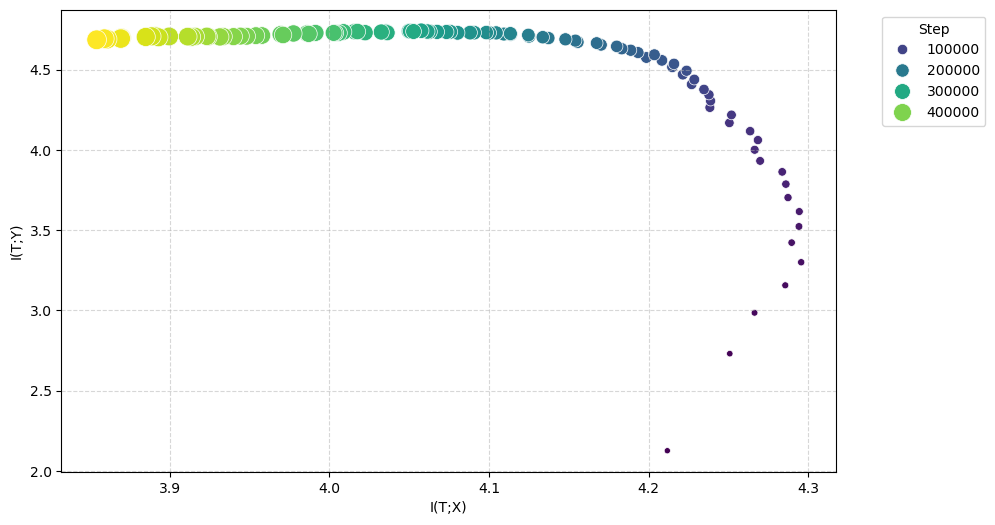

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the mutual information summary
df = pd.read_csv('final-S5_mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv')



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MI(X;T) Input to Hidden Layer', y='MI(T;Y) Hidden to Output Layer', hue='Step', palette='viridis', size='Step', sizes=(20, 200))

plt.xlabel('I(T;X)')
plt.ylabel('I(T;Y)')
#plt.title('Mutual Information Evolution Over Training')

plt.legend(title='Step', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.savefig('final-S5-mutual_information_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

**Plotting the evolution of mutual information (every 100 steps)**

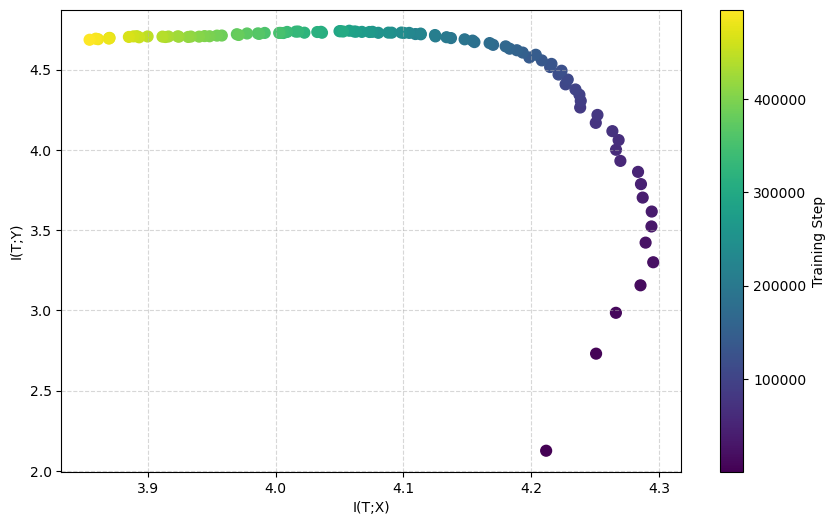

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the mutual information summary
df = pd.read_csv('final-S5_mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv')

# Filter to only keep rows where Step is divisible by 10000
df_filtered = df[df['Step'] % 100 == 0]

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot of filtered points
sc = plt.scatter(df_filtered['MI(X;T) Input to Hidden Layer'], df_filtered['MI(T;Y) Hidden to Output Layer'], 
                  c=df_filtered['Step'], cmap='viridis', s=60)

# Colorbar to show step number
cbar = plt.colorbar(sc)
cbar.set_label('Training Step')

# Labels and title
plt.xlabel('I(T;X)')
plt.ylabel('I(T;Y)')
#plt.title(' Mutual Information Evolution Over Training (Every 100 Steps)')

# Optional grid
plt.grid(True, linestyle='--', alpha=0.5)

# Save as PDF
plt.savefig('final-S5-mutual_information_plot.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()


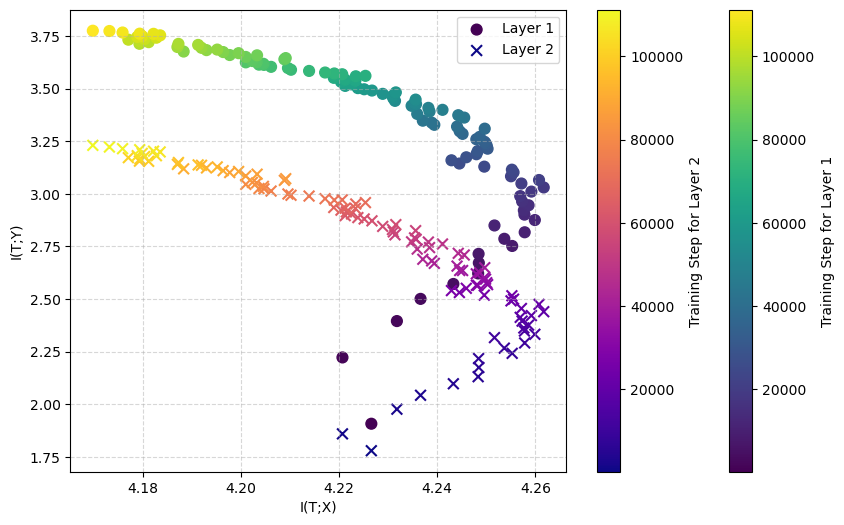

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the mutual information summaries for two different layers
df1 = pd.read_csv('final-moddiv_mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv')
df2 = pd.read_csv('final-moddiv_mutual_information_results(transformer.transformer_blocks.1.attn.query_proj).csv')  # Change to your actual second CSV file

# Filter to only keep rows where Step is divisible by 10000
df1_filtered = df1[df1['Step'] % 100 == 0]
df2_filtered = df2[df2['Step'] % 100 == 0]

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot for first layer
sc1 = plt.scatter(df1_filtered['MI(X;T) Input to Hidden Layer'], df1_filtered['MI(T;Y) Hidden to Output Layer'], 
                   c=df1_filtered['Step'], cmap='viridis', s=60, label="Layer 1")

# Scatter plot for second layer
sc2 = plt.scatter(df2_filtered['MI(X;T) Input to Hidden Layer'], df2_filtered['MI(T;Y) Hidden to Output Layer'], 
                   c=df2_filtered['Step'], cmap='plasma', s=60, marker='x', label="Layer 2")

# Colorbar for step number
cbar1 = plt.colorbar(sc1)
cbar2 = plt.colorbar(sc2)
cbar1.set_label('Training Step for Layer 1')
cbar2.set_label('Training Step for Layer 2')

# Labels and title
plt.xlabel('I(T;X)')
plt.ylabel('I(T;Y)')
#plt.title('Mutual Information Evolution Over Training (Every 5000 Steps)')

# Add legend to differentiate layers
plt.legend()

# Optional grid
plt.grid(True, linestyle='--', alpha=0.5)

# Save as PDF
plt.savefig('moddiv-mutual_information_comparison.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()


In [4]:
!pwd

/Users/animikghosh/grokking/scripts


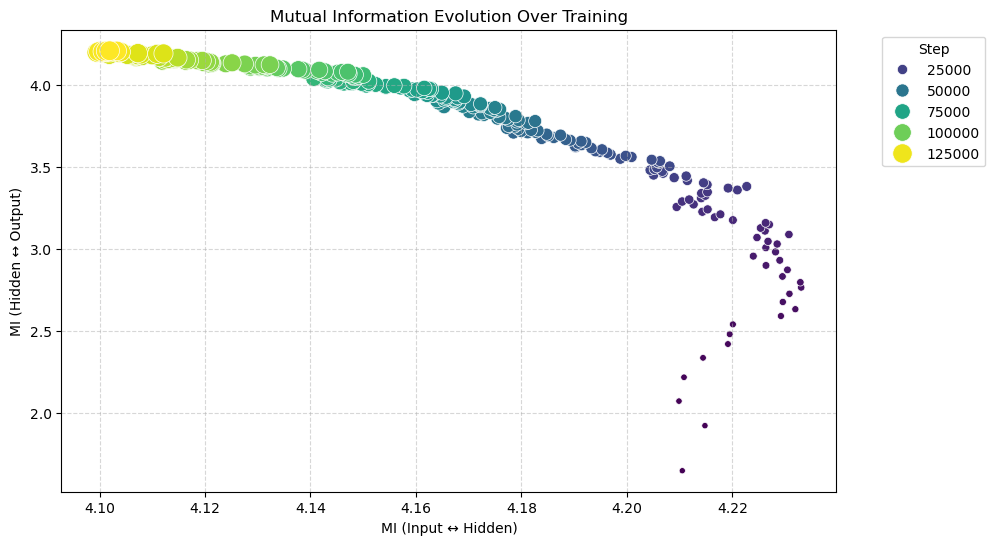

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the mutual information summary
df = pd.read_csv('(mod-div)mutual_information_results(transformer.transformer_blocks.0.ff2).csv')



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MI(X;T) Input to Hidden Layer', y='MI(T;Y) Hidden to Output Layer', hue='Step', palette='viridis', size='Step', sizes=(20, 200))

plt.xlabel('MI (Input ↔ Hidden)')
plt.ylabel('MI (Hidden ↔ Output)')
plt.title('Mutual Information Evolution Over Training')

plt.legend(title='Step', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [4]:
!ls

S5_downloaded_weights
S5_mutual_information_results(transformer.transformer_blocks.1.attn.key_proj.weight).csv
S5_weight_csv
Untitled1.ipynb
WeightEvol.ipynb
__pycache__
analytical_mutual_information_summary.csv
artifacts
compute_mutual_info.py
downloaded_weights
experimental_setup.py
hydra
information_process.py
model_weights.csv
model_weights.pth
mutual information.ipynb
mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv
mutual_information_results(transformer.transformer_blocks.0.ff2).csv
mutual_information_results(transformer.transformer_blocks.1.attn.query_proj).csv
mutual_information_results(transformer.transformer_blocks.1.ff1.weight).csv
outputs
plots
test.csv
train_grokk.py
train_grokk1.py
weight_csv(mod div)
weightdownload.py


In [5]:
%cd weight_csv\(mod\ div\)
!pwd

/Users/animikghosh/grokking/scripts/weight_csv(mod div)
/Users/animikghosh/grokking/scripts/weight_csv(mod div)


In [7]:
%cd ..
!pwd

/Users/animikghosh/grokking/scripts
/Users/animikghosh/grokking/scripts


In [1]:
!pwd

/Users/animikghosh/grokking/scripts


In [2]:
!ls

S5-mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv
S5_downloaded_weights
S5_mutual_information_results(transformer.transformer_blocks.1.attn.key_proj.weight).csv
S5_weight_csv
Untitled.ipynb
Untitled1.ipynb
WeightEvol.ipynb
__pycache__
analytical_mutual_information_summary.csv
compute_mutual_info.py
downloaded_weights
experimental_setup.py
hydra
information_process.py
moddiv_downloaded_weights
moddiv_mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv
moddiv_weight_csv
model_weights.csv
model_weights.pth
mutual information.ipynb
mutual_information_results(transformer.transformer_blocks.0.attn.query_proj).csv
mutual_information_results(transformer.transformer_blocks.0.ff2).csv
mutual_information_results(transformer.transformer_blocks.1.attn.query_proj).csv
mutual_information_results(transformer.transformer_blocks.1.ff1.weight).csv
outputs
plots
test.csv
train_grokk.py
train_grokk1.py
weight_csv(mod div)
weightdownload.py
